In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# Task 1

In [2]:
data1=pd.read_csv('property1.csv',skiprows=2,nrows=2728)
data1.tail()

,S/N,Project Name,Street Name,Type,Postal District,Market Segment,Tenure,Type of Sale,No. of Units,Price ($),Nett Price ($),Area (Sqft),Type of Area,Floor Level,Unit Price ($psf),Date of Sale
2723,2724,EVERGREEN PARK,HOUGANG AVENUE 7,Apartment,19,OCR,99 yrs lease commencing from 1995,Resale,1,895000,-,1356,Strata,01 to 05,660,Jan-2018
2724,2725,EVERGREEN PARK,HOUGANG AVENUE 7,Apartment,19,OCR,99 yrs lease commencing from 1995,Resale,1,770000,-,1173,Strata,11 to 15,656,Jan-2018
2725,2726,CENTRAL VIEW,HOUGANG STREET 11,Condominium,19,OCR,99 yrs lease commencing from 1998,Resale,1,1060000,-,1259,Strata,01 to 05,842,Jan-2018
2726,2727,KENSINGTON PARK CONDOMINIUM,KENSINGTON PARK DRIVE,Condominium,19,OCR,999 yrs lease commencing from 1878,Resale,1,1780000,-,1658,Strata,01 to 05,1074,Jan-2018
2727,2728,THE MINTON,HOUGANG STREET 11,Condominium,19,OCR,99 yrs lease commencing from 2007,Resale,1,1450000,-,1216,Strata,11 to 15,1192,Jan-2018


In [3]:
data1.columns

Index(['S/N', 'Project Name', 'Street Name', 'Type', 'Postal District',
       'Market Segment', 'Tenure', 'Type of Sale', 'No. of Units', 'Price ($)',
       'Nett Price ($)', 'Area (Sqft)', 'Type of Area', 'Floor Level',
       'Unit Price ($psf)', 'Date of Sale'],
      dtype='object')

## a

In [4]:
data1['Date of Sale']=pd.to_datetime(data1['Date of Sale'])
data1['Year']=pd.DatetimeIndex(data1['Date of Sale']).year
data1['Month']=pd.DatetimeIndex(data1['Date of Sale']).month

In [5]:
data1.groupby('Year').agg({'Price ($)':'median'})

,Price ($)
Year,
2018,1100000.0
2019,1157500.0
2020,1100000.0


**Median Prices**
**********
|Year|Price ($)|
|---|---|
|2018|1100000|
|2019|1157500|
|2020|1100000|

## b

In [6]:
data1.sort_values(['Unit Price ($psf)'],ascending=False,inplace=True)
data1['S/N']=np.arange(data1.shape[0])
data1.head(2)

,S/N,Project Name,Street Name,Type,Postal District,Market Segment,Tenure,Type of Sale,No. of Units,Price ($),Nett Price ($),Area (Sqft),Type of Area,Floor Level,Unit Price ($psf),Date of Sale,Year,Month
1025,0,THE TEMBUSU,TAMPINES ROAD,Condominium,19,OCR,Freehold,Resale,1,1388000,-,764,Strata,11 to 15,1816,2019-10-01,2019,10
2238,1,THE TEMBUSU,TAMPINES ROAD,Condominium,19,OCR,Freehold,Resale,1,1368000,-,753,Strata,16 to 20,1816,2018-04-01,2018,4


In [7]:
freehold=data1[data1['Tenure']=='Freehold']['Unit Price ($psf)'].mean()
not_freehold=data1[data1['Tenure']!='Freehold']['Unit Price ($psf)'].mean()
print('Freehold: {}, Not Freehold: {}'.format(freehold,not_freehold))

Freehold: 1230.5080459770115, Not Freehold: 1075.1652856519843


In [8]:
data1.groupby('Type of Area').agg({'Unit Price ($psf)':'mean'}).sort_values('Unit Price ($psf)',ascending=False)

,Unit Price ($psf)
Type of Area,
Strata,1100.477431
Land,608.000000


In [9]:
data1.groupby('Floor Level').agg({'Unit Price ($psf)':'mean'}).sort_values('Unit Price ($psf)',ascending=False)

,Unit Price ($psf)
Floor Level,
21 to 25,1180.000000
06 to 10,1114.359756
11 to 15,1103.853354
01 to 05,1095.806400
16 to 20,1062.056497
-,966.500000


In [10]:
data1.groupby('Market Segment').agg({'Unit Price ($psf)':'mean'}).sort_values('Unit Price ($psf)',ascending=False)

,Unit Price ($psf)
Market Segment,
RCR,1164.875000
OCR,1099.359467


In [11]:
data1.groupby('Type').agg({'Unit Price ($psf)':'mean'}).sort_values('Unit Price ($psf)',ascending=False)

,Unit Price ($psf)
Type,
Apartment,1101.369565
Condominium,1099.259978


<IPython.core.display.Javascript object>


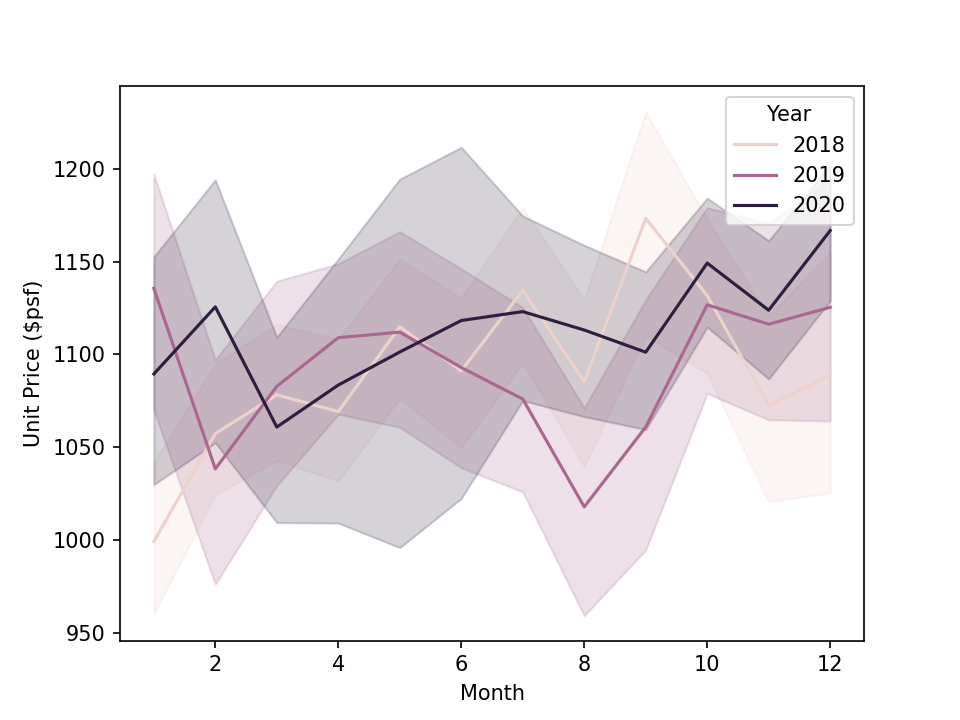

In [12]:
%matplotlib notebook
sns.lineplot(x='Month',y='Unit Price ($psf)',hue='Year',data=data1);

In [13]:
data1.groupby(['Street Name','Project Name']).agg({'S/N':'mean'}).sort_values('S/N')

S/N
Street Name           Project Name                       
LIM TUA TOW ROAD      CAMBIO SUITES             18.000000
TAMPINES ROAD         THE TEMBUSU               75.708333
                      TRILIVE                   96.400000
UPPER PAYA LEBAR ROAD BOTANIQUE AT BARTLEY     117.181818
LEW LIAN VALE         JADE RESIDENCES          121.875000
...                                                   ...
RIVERVALE CRESCENT    RIVERVALE CREST         2607.161290
BUANGKOK GREEN        HOUGANG GREEN           2614.777778
BOUNDARY ROAD         RESIDENTIAL APARTMENTS  2623.000000
HOUGANG AVENUE 7      EVERGREEN PARK          2626.153846
YIO CHU KANG ROAD     RESIDENTIAL APARTMENTS  2709.000000

[147 rows x 1 columns]

**Possible Factors**<br>
The most expensive condo on PSF basis: at the price of 1816$ per square foot
- Tenure: The PSF prices of freehold are obviously higher than that of not freehold.
- Type of Area: The PSF prices of strata are obviously higher than that of land.
- Floor Level, Market Segment, Type: These three factors make little difference on PSF prices. Here, they may not be the key factors.
- Date of Sale: According to the plot, we can see the trend of each year by month. Though the lines are different in each year, there are still some common characteristics.The PSF prices of apartments sold in August are relatively lower, while they are followed by an increasing trend. The PSF prices reached a small peak in October 2019.
- Street Name, Project Name: We group by street then by project, and calculate the mean ranking of PSF price of each group. The most expensive condo belongs to THE TEMBUSU project on TAMPINES ROAD, the mean ranking of which is the second highest.

# Task 2

In [14]:
data2=pd.read_csv('property2.csv',skiprows=2,nrows=153)
data2.tail()

,S/N,Project Name,Street Name,Developer,Property Type,Locality,Total Number of Units in Project,Cumulative Units Launched to-date,Cumulative Units Sold to-date,Total Number of Unsold Units,Cumulative Units Launched but Unsold,Units Launched in the Month,Units Sold in the Month,Median Price ($psf) # in the Month,Lowest Price ($psf) # in the Month,Highest Price ($psf) # in the Month
148,149,PARC ESTA,SIMS AVENUE,MCL Land (Everbright) Pte Ltd,Non-Landed,RCR,1399,1399,1382,17,17,0,6,1769,1616,1830
149,150,REZI 24,LORONG 24 GEYLANG,Development 24 Pte Ltd,Non-Landed,RCR,110,110,104,6,6,0,4,1614,1556,1677
150,151,COASTLINE RESIDENCES,AMBER ROAD,SL Capital (3) Pte Ltd,Non-Landed,RCR,144,144,67,77,77,0,7,2523,2307,2798
151,152,FORETT AT BUKIT TIMAH,TOH TUCK ROAD,Qingjian Perennial (Bukit Timah) Pte Ltd,Non-Landed,RCR,633,460,345,288,115,0,29,1981,1695,2123
152,153,OLLOI,LORONG 101 CHANGI,K16 Development Pte Ltd,Non-Landed,RCR,34,34,25,9,9,0,1,1718,1718,1718


In [15]:
data2.columns

Index(['S/N', 'Project Name', 'Street Name', 'Developer', 'Property Type',
       'Locality', 'Total Number of Units in Project',
       'Cumulative Units Launched to-date', 'Cumulative Units Sold to-date',
       'Total Number of Unsold Units', 'Cumulative Units Launched but Unsold',
       'Units Launched in the Month', 'Units Sold in the Month',
       'Median Price ($psf) # in the Month',
       'Lowest Price ($psf) # in the Month',
       'Highest Price ($psf) # in the Month'],
      dtype='object')

In [16]:
data2.drop(data2[data2['Locality']!='RCR'].index,inplace=True)

In [17]:
data2.sort_values('Cumulative Units Sold to-date',ascending=False).head(3)

,S/N,Project Name,Street Name,Developer,Property Type,Locality,Total Number of Units in Project,Cumulative Units Launched to-date,Cumulative Units Sold to-date,Total Number of Unsold Units,Cumulative Units Launched but Unsold,Units Launched in the Month,Units Sold in the Month,Median Price ($psf) # in the Month,Lowest Price ($psf) # in the Month,Highest Price ($psf) # in the Month
148,149,PARC ESTA,SIMS AVENUE,MCL Land (Everbright) Pte Ltd,Non-Landed,RCR,1399,1399,1382,17,17,0,6,1769,1616,1830
104,105,STIRLING RESIDENCES,STIRLING ROAD,LN Development (Stirling) Pte Ltd,Non-Landed,RCR,1259,1259,1202,57,57,0,16,2101,1641,2232
108,109,JADESCAPE,SHUNFU ROAD,Qingjian Realty (Marymount) Pte Ltd,Non-Landed,RCR,1206,1206,1124,82,82,0,43,1802,1704,1924


**Top Three Condo Projects**
**********
|Project Name|Units Sold|
|---|---|
|PARC ESTA|1382|
|STIRLING RESIDENCES|1202|
|JADESCAPE|1124|

# Task 3

The possible reason is that the area difference among HDB flats in the same town is small, while the area of condos varies greatly even they are in the same town. When we use the median prices, we ignore the factor of area.